In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [245]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

cpi = pd.read_csv("cpi.csv")
geo_attributes = pd.read_csv("geo_attributes.csv")
interest = pd.read_csv("interest.csv")
properties = pd.read_csv("properties.csv")
rent_index = pd.read_csv("rentIndex.csv")
sample_submission = pd.read_csv("sample_submission.csv")
vacant = pd.read_csv("vacant.csv")

In [5]:
train.head(5)

,property_key,contractDate,price
0,p-c1ce31019,2018-03-01,1850000.0
1,p-a7fd7deb5,2018-03-01,1030000.0
2,p-2a981615e,2018-03-01,4300000.0
3,p-2bb570b5d,2018-03-01,1400888.0
4,p-4ccd6e1db,2018-03-01,725000.0


In [7]:
geo_attributes.head(5)

,street,project,district,lat,lng,num_schools_1km,num_supermarkets_500m,num_mrt_stations_500m
0,LIM AH WOO ROAD,SUITES @ GUILLEMARD,15,1.312520,103.891760,7,2,3
1,HOLLAND ROAD,LOFT@HOLLAND,10,1.312364,103.797169,0,3,4
2,SOUTH BUONA VISTA ROAD,VIVA VISTA,5,1.279803,103.785910,0,0,2
3,UPPER SERANGOON ROAD,PARK RESIDENCES KOVAN,19,1.357934,103.881932,7,2,1
4,NATHAN ROAD,LOFT @ NATHAN,10,1.294461,103.827621,2,4,4


In [9]:
properties.head(5)

,area,floorRange,propertyType,district,typeOfArea,tenure,street,project,marketSegment,property_key
0,226.0,01-05,Condominium,4,Strata,99 yrs lease commencing from 2007,COVE DRIVE,TURQUOISE,CCR,p-7b6c69000
1,194.0,01-05,Condominium,4,Strata,99 yrs lease commencing from 2007,COVE DRIVE,TURQUOISE,CCR,p-320ed2726
2,348.0,06-10,Condominium,4,Strata,99 yrs lease commencing from 2007,COVE DRIVE,TURQUOISE,CCR,p-2bc5c4951
3,223.0,01-05,Condominium,4,Strata,99 yrs lease commencing from 2007,COVE DRIVE,TURQUOISE,CCR,p-f060c5be0
4,195.0,01-05,Condominium,4,Strata,99 yrs lease commencing from 2007,COVE DRIVE,TURQUOISE,CCR,p-a8d1004a9


In [6]:
# consumer price index, changes in price for good and services brought by households 
cpi.head(5)

,Data Series,CPI
0,2022 Dec,111.186
1,2022 Nov,110.959
2,2022 Oct,109.893
3,2022 Sep,110.339
4,2022 Aug,109.863


In [8]:
# lower means more people lend $$ and cause the demand to rise
interest.head(5)

,Data Series,InterestRate
0,2022 Dec,1.48
1,2022 Nov,1.47
2,2022 Oct,1.17
3,2022 Sep,1.03
4,2022 Aug,0.95


In [10]:
# lower means less people renting
rent_index.head(5)

,Data Series,RentIndex
0,2022 4Q,148.1
1,2022 3Q,137.9
2,2022 2Q,127.0
3,2022 1Q,119.0
4,2021 4Q,114.2


In [11]:
# availability of the number of houses
vacant.head(5)

,Data Series,Available,Vacant
0,2022 4Q,34084,524
1,2022 3Q,34084,514
2,2022 2Q,34084,452
3,2022 1Q,34084,517
4,2021 4Q,34084,576


In [175]:
properties.shape

(31530, 10)

In [246]:
# data integration
train = pd.merge(left=train, right=properties, on="property_key", how='left')
train = pd.merge(left=train, right=geo_attributes, on=["project", "district", "street"], how='left')

In [131]:
train.shape

(62949, 17)

In [135]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62949 entries, 0 to 62948
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_key           62949 non-null  object 
 1   contractDate           62949 non-null  object 
 2   price                  62949 non-null  float64
 3   area                   62949 non-null  float64
 4   floorRange             62949 non-null  object 
 5   propertyType           62949 non-null  object 
 6   district               62949 non-null  int64  
 7   typeOfArea             62949 non-null  object 
 8   tenure                 62949 non-null  object 
 9   street                 62949 non-null  object 
 10  project                62949 non-null  object 
 11  marketSegment          62949 non-null  object 
 12  lat                    62948 non-null  float64
 13  lng                    62948 non-null  float64
 14  num_schools_1km        62948 non-null  float64
 15  nu

In [146]:
train.loc[train['num_mrt_stations_500m'].isna()]

,property_key,contractDate,price,area,floorRange,propertyType,district,typeOfArea,tenure,street,project,marketSegment,lat,lng,num_schools_1km,num_supermarkets_500m,num_mrt_stations_500m
24207,p-53b215525,2020-09-01,8880000.0,923.1,-,Detached,19,Land,Freehold,JOON HIANG ROAD,SUMMER GROVE,OCR,1.3536,NaN,NaN,NaN,NaN


In [54]:
train['tenure'].unique()

array(['99 yrs lease commencing from 2005', 'Freehold',
       '99 yrs lease commencing from 2009',
       '99 yrs lease commencing from 2011',
       '99 yrs lease commencing from 1996',
       '99 yrs lease commencing from 1992',
       '99 yrs lease commencing from 1995',
       '999 yrs lease commencing from 1877',
       '99 yrs lease commencing from 2001',
       '99 yrs lease commencing from 1994',
       '99 yrs lease commencing from 2007',
       '999 yrs lease commencing from 1991',
       '99 yrs lease commencing from 2000',
       '999 yrs lease commencing from 1885',
       '99 yrs lease commencing from 2012',
       '99 yrs lease commencing from 2010',
       '99 yrs lease commencing from 1979',
       '999 yrs lease commencing from 1882',
       '99 yrs lease commencing from 2008',
       '99 yrs lease commencing from 1997',
       '103 yrs lease commencing from 1977',
       '103 yrs lease commencing from 1975',
       '102 yrs lease commencing from 1978',
       '60 yr

In [45]:
train.describe()

,price,area,district_x,district_y,lat,lng,num_schools_1km,num_supermarkets_500m,num_mrt_stations_500m
count,9.553100e+04,95531.000000,95531.000000,95531.000000,95531.000000,95531.000000,95531.000000,95531.000000,95531.000000
mean,1.932097e+06,135.187213,14.860935,14.912144,1.334215,103.859341,3.956475,1.692288,2.191498
std,1.826785e+06,91.081735,6.062439,6.079784,0.035786,0.054853,2.845748,1.827023,2.036469
min,3.400000e+05,24.000000,1.000000,1.000000,1.239785,103.691906,0.000000,0.000000,0.000000
25%,1.078000e+06,91.000000,10.000000,10.000000,1.311026,103.829676,2.000000,0.000000,1.000000
50%,1.400000e+06,113.000000,15.000000,15.000000,1.321553,103.862219,3.000000,1.000000,2.000000
75%,1.968000e+06,148.000000,19.000000,19.000000,1.357784,103.898637,6.000000,2.000000,3.000000
max,3.628000e+07,996.800000,28.000000,28.000000,1.461014,103.975852,21.000000,11.000000,14.000000


In [4]:
def parse_tenure_length(tenure):
    if tenure == "Freehold":
        return 1000
    
    else:
        tenure_str = tenure.split(" yrs lease commencing from ")
        
        return int(tenure_str[0])
    
def parse_tenure_until(tenure):
    if tenure == "Freehold":
        return -1
    
    else:
        tenure_str = tenure.split(" yrs lease commencing from ")
        
        return int(tenure_str[1])
    
def freehold_or_leasehold(tenure):
    if tenure == "Freehold":
        return tenure
    
    else:
        return "Leasehold"

In [240]:
def process_data(df):   
    # feature engineering
    df['tenure_length'] = df['tenure'].apply(parse_tenure_length)
    df['tenure_until'] = df['tenure'].apply(parse_tenure_until)
    df['tenure_type'] = df['tenure'].apply(freehold_or_leasehold)

    df = df.drop('tenure', axis=1)
    
    df[['lower_floor', 'upper_floor']] = df['floorRange'].str.split('-', expand=True)
    df['lower_floor'] = df['lower_floor'].replace({ '-': '0', '': '0', 'B1': '-1' })
    df['upper_floor'] = df['upper_floor'].replace({ '-': '0', '': '0', 'B5': '-5' })

    df['lower_floor'] = df['lower_floor'].astype('int32')
    df['upper_floor'] = df['upper_floor'].astype('int32')

    df = df.drop('floorRange', axis=1)
    
    df['contractDate'] = pd.to_datetime(df['contractDate'])
    df['contract_year'] = df['contractDate'].dt.year
    df['contract_month'] = df['contractDate'].dt.month
    df['contract_day'] = df['contractDate'].dt.day

    df = df.drop('contractDate', axis=1)
    
    return df

In [247]:
train = process_data(train)

# handles missing values (only 1 missing value so manually fill in)
train.loc[train['num_mrt_stations_500m'].isna(), 'lat'] = 1.3536
train.loc[train['num_mrt_stations_500m'].isna(), 'lng'] = 103.8748
train.loc[train['num_mrt_stations_500m'].isna(), 'num_schools_1km'] = np.round(train['num_schools_1km'].mean())
train.loc[train['num_mrt_stations_500m'].isna(), 'num_supermarkets_500m'] = np.round(train['num_supermarkets_500m'].mean())
train.loc[train['num_mrt_stations_500m'].isna(), 'num_mrt_stations_500m'] = np.round(train['num_mrt_stations_500m'].mean())

In [248]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62949 entries, 0 to 62948
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_key           62949 non-null  object 
 1   price                  62949 non-null  float64
 2   area                   62949 non-null  float64
 3   propertyType           62949 non-null  object 
 4   district               62949 non-null  int64  
 5   typeOfArea             62949 non-null  object 
 6   street                 62949 non-null  object 
 7   project                62949 non-null  object 
 8   marketSegment          62949 non-null  object 
 9   lat                    62949 non-null  float64
 10  lng                    62949 non-null  float64
 11  num_schools_1km        62949 non-null  float64
 12  num_supermarkets_500m  62949 non-null  float64
 13  num_mrt_stations_500m  62949 non-null  float64
 14  tenure_length          62949 non-null  int64  
 15  te

### Univariate Analysis

In [9]:
def distribution_univariate(variable):
    plt.figure(1, layout='tight', figsize=(14, 8))

    plt.subplot(1, 2, 1)
    sns.histplot(train[variable], bins=30, kde=True)
    plt.title("Distribution of " + variable)

    plt.subplot(1, 2, 2)
    sns.boxplot(train[variable])

    plt.show()


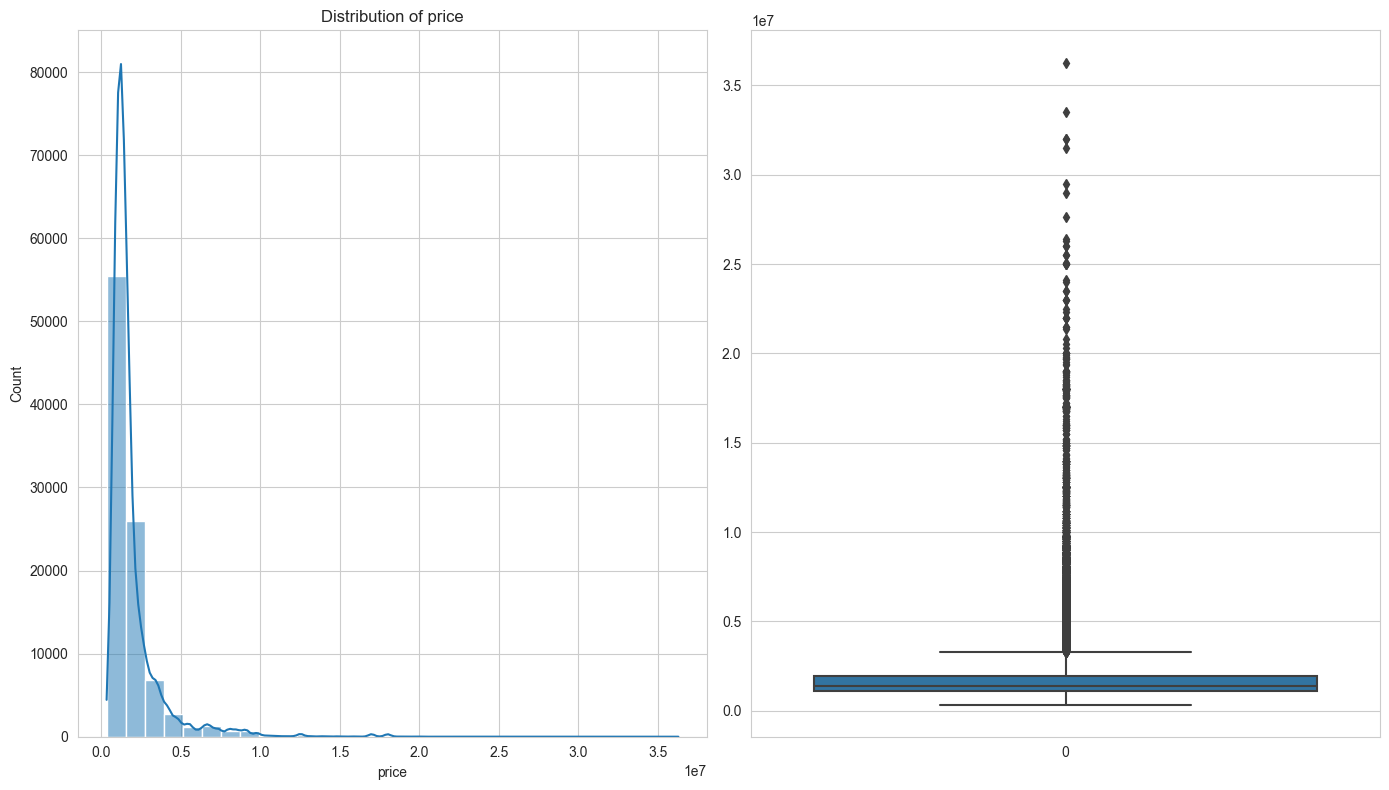

In [121]:
distribution_univariate("price")

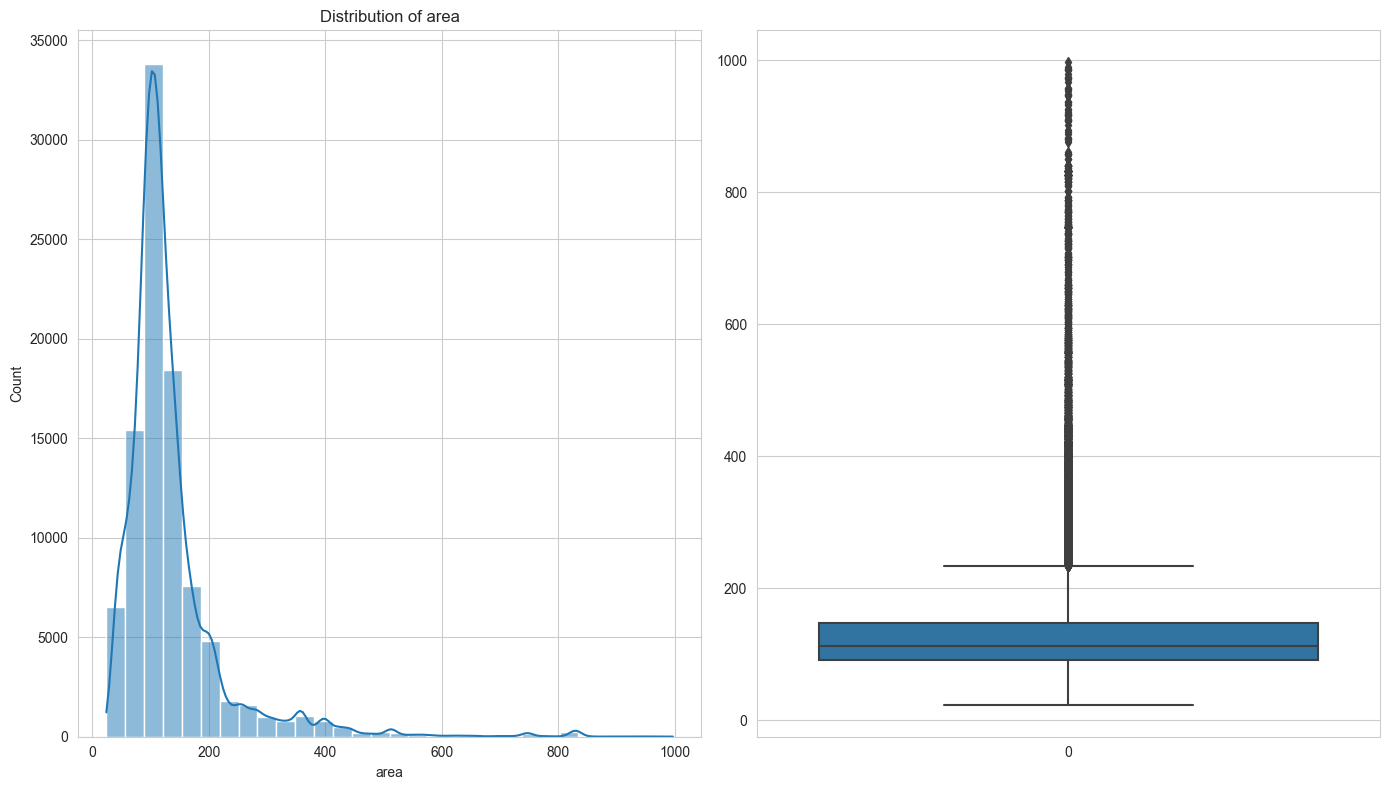

In [122]:
distribution_univariate("area")

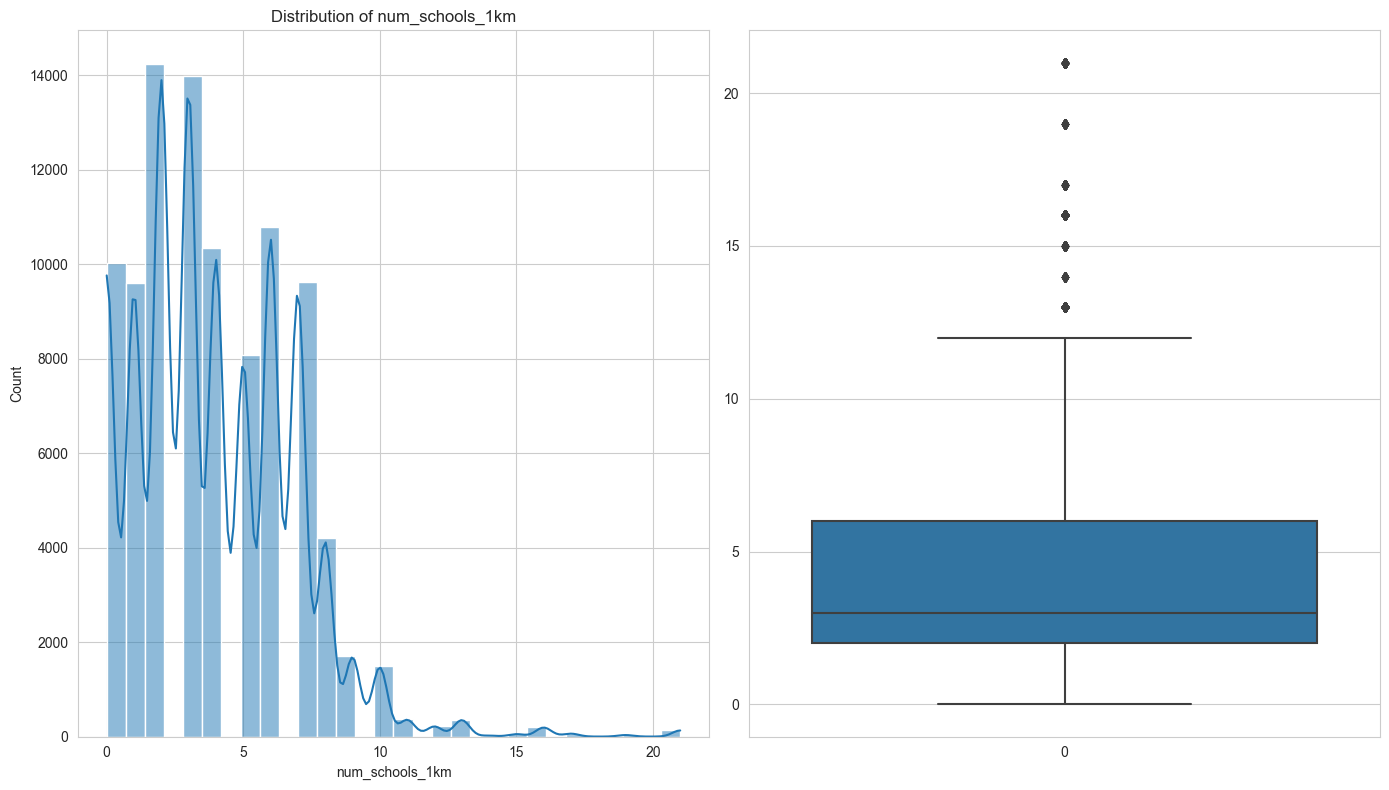

In [128]:
distribution_univariate("num_schools_1km")

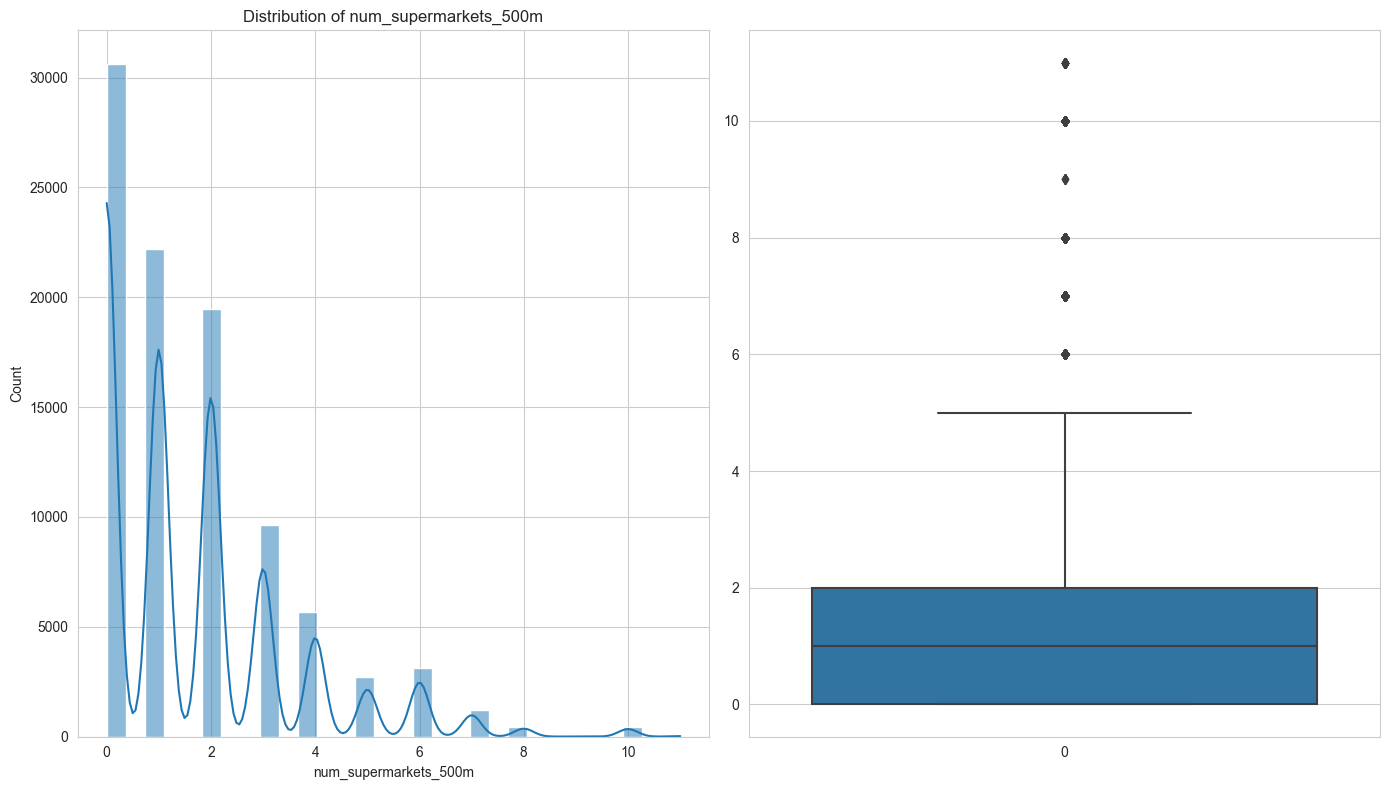

In [131]:
distribution_univariate("num_supermarkets_500m")

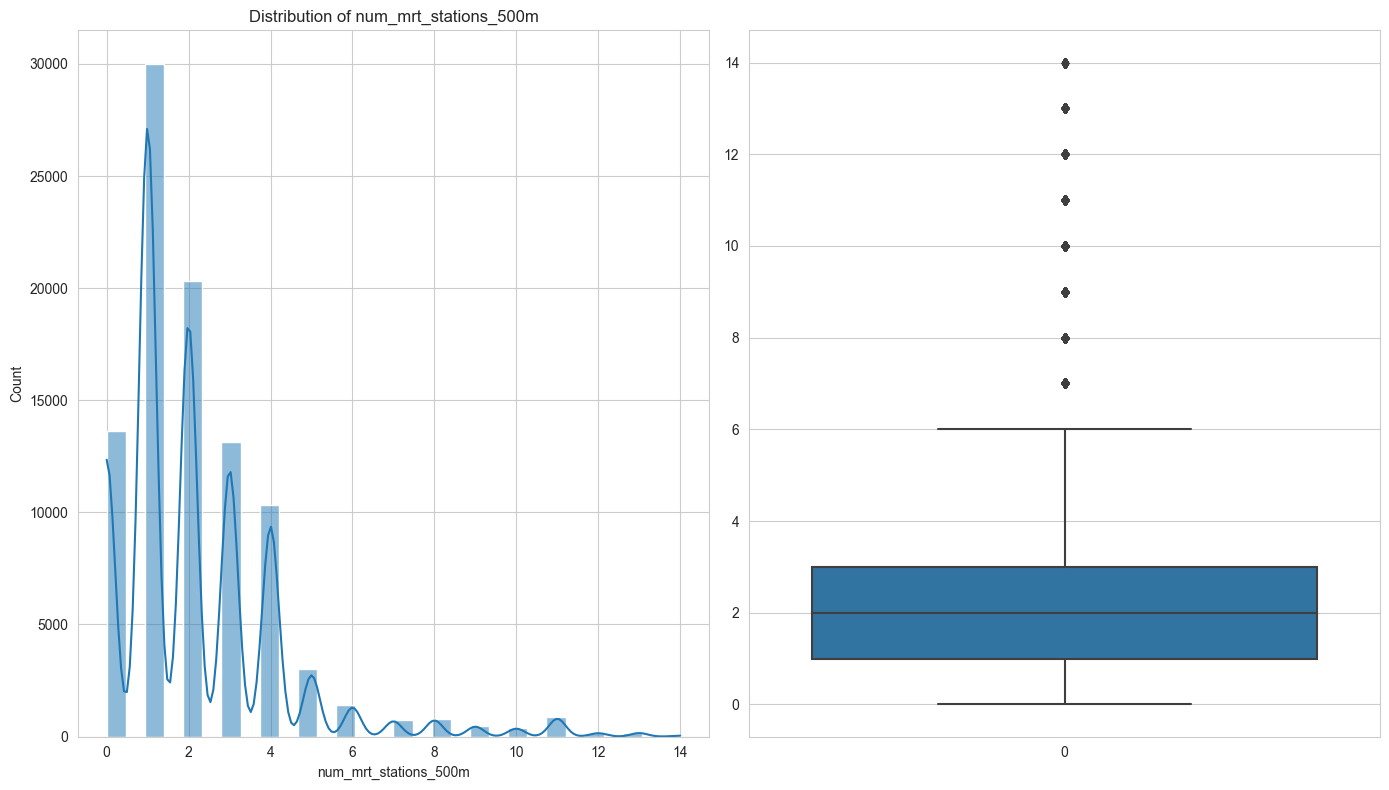

In [132]:
distribution_univariate("num_mrt_stations_500m")

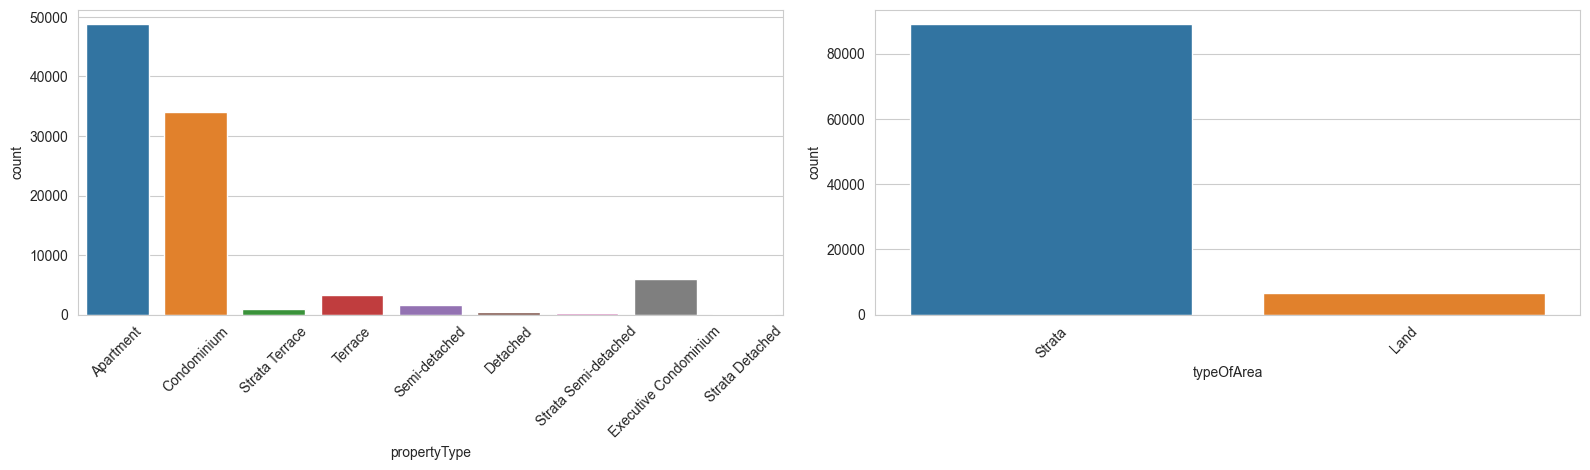

In [10]:
plt.figure(figsize=(16, 8), layout='tight')

plt.subplot(2, 2, 1)
sns.countplot(x=train['propertyType'])
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.countplot(x=train['typeOfArea'])
plt.xticks(rotation=45)

plt.show()

### Multivariate Analysis

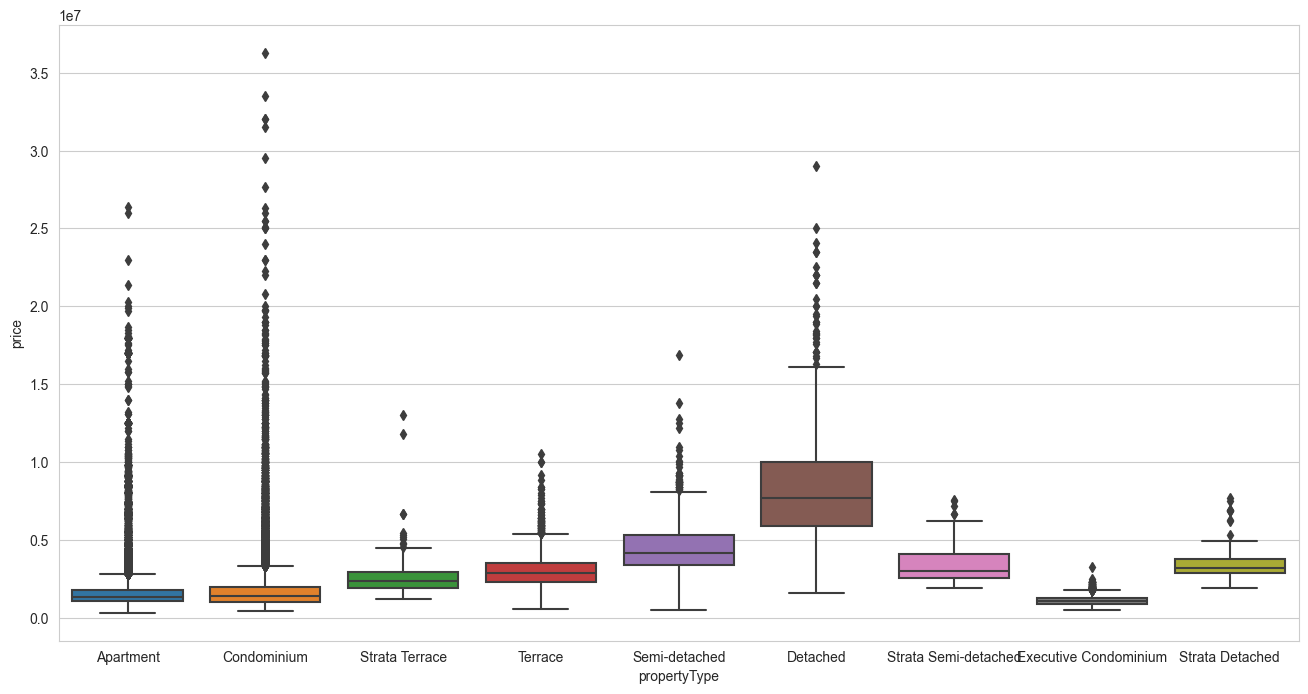

In [145]:
plt.figure(figsize=(16, 8))

sns.boxplot(data=train, x="propertyType", y="price")

plt.show()

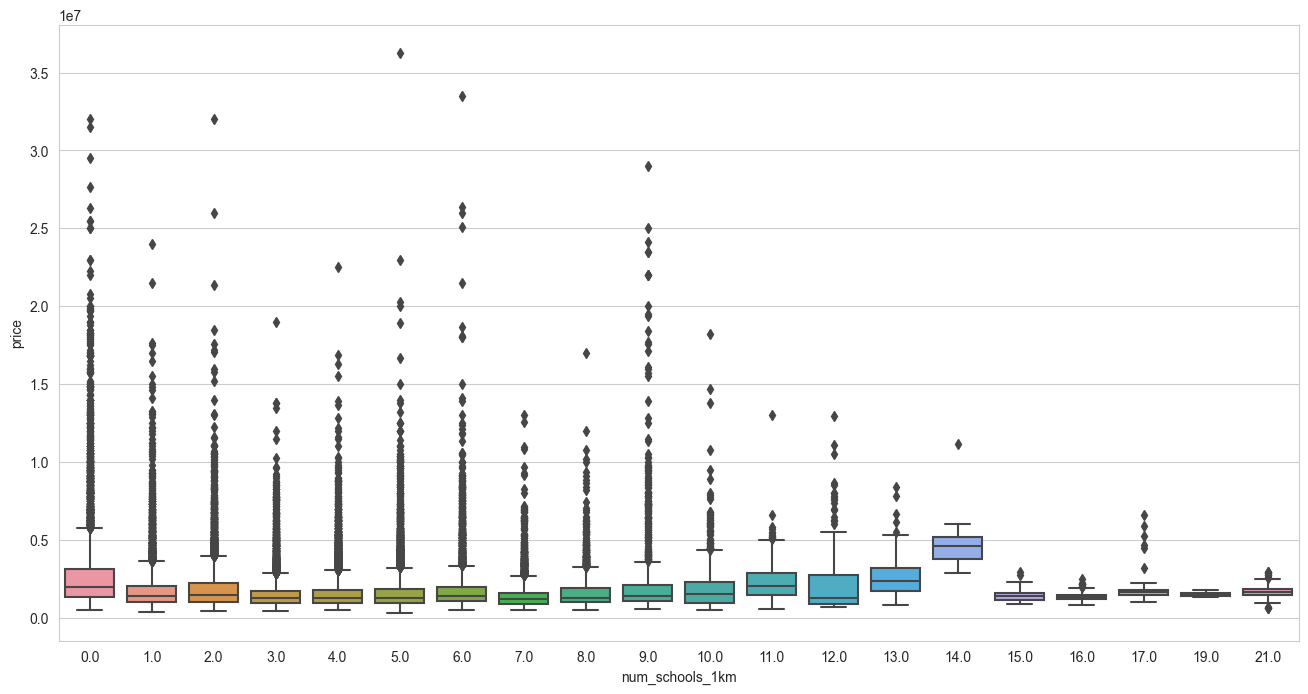

In [249]:
plt.figure(figsize=(16, 8))

sns.boxplot(data=train, x="num_schools_1km", y="price")

plt.show()

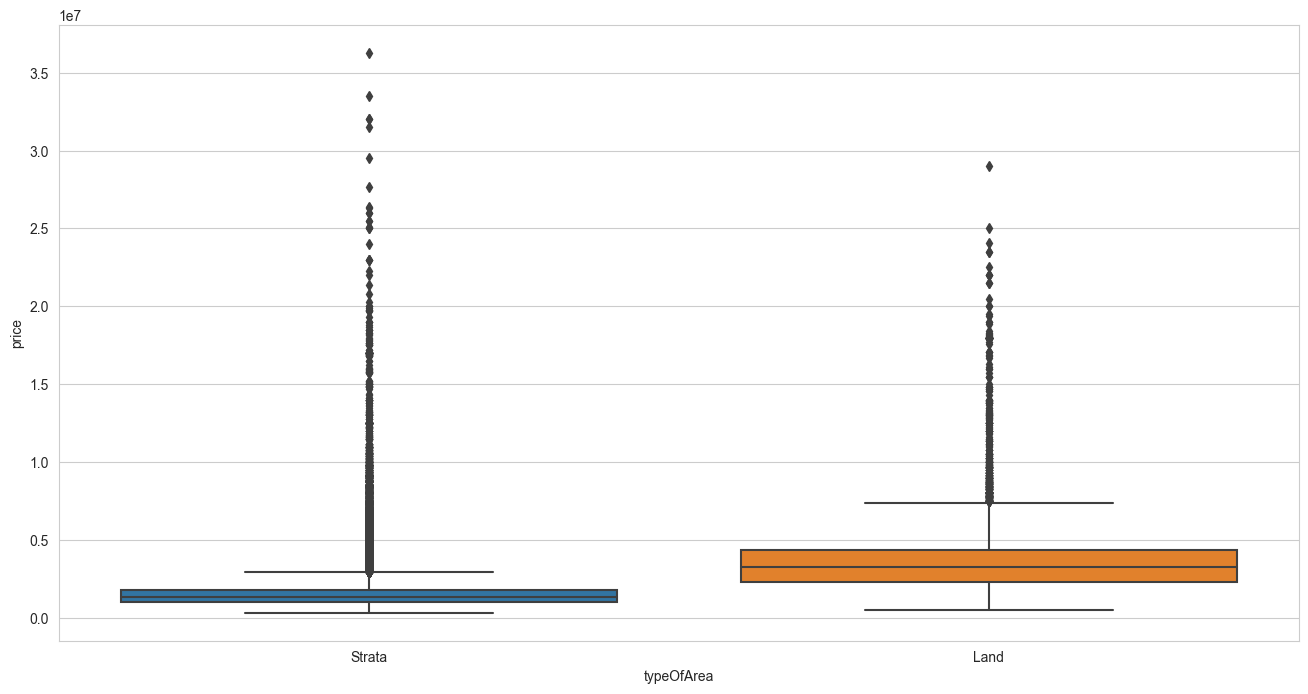

In [146]:
plt.figure(figsize=(16, 8))

sns.boxplot(data=train, x="typeOfArea", y="price")

plt.show()

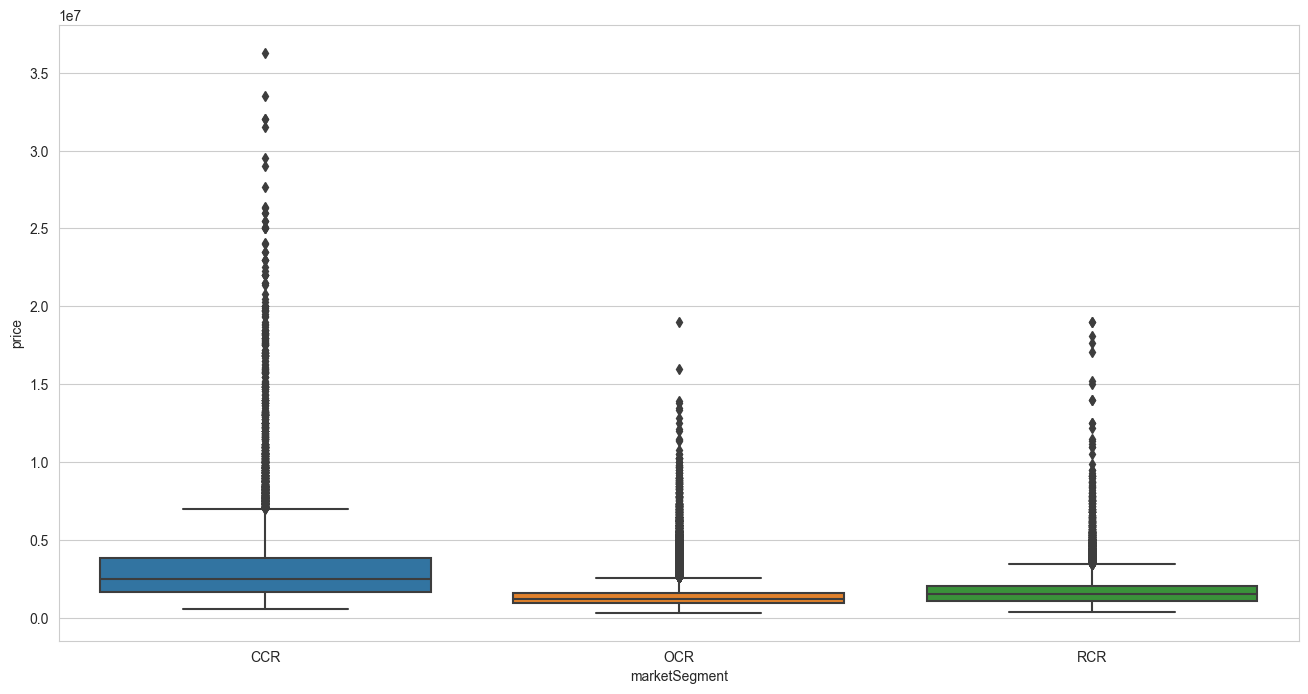

In [250]:
plt.figure(figsize=(16, 8))

sns.boxplot(data=train, x="marketSegment", y="price")

plt.show()

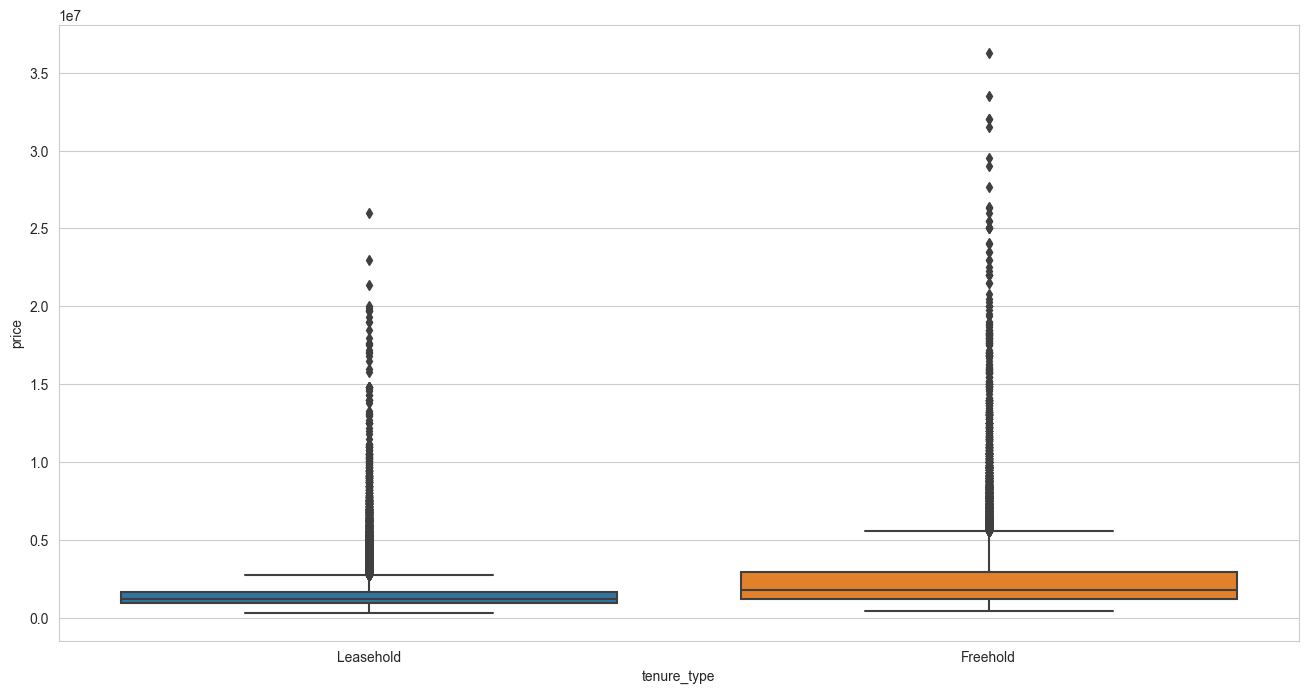

In [251]:
plt.figure(figsize=(16, 8))

sns.boxplot(data=train, x="tenure_type", y="price")

plt.show()

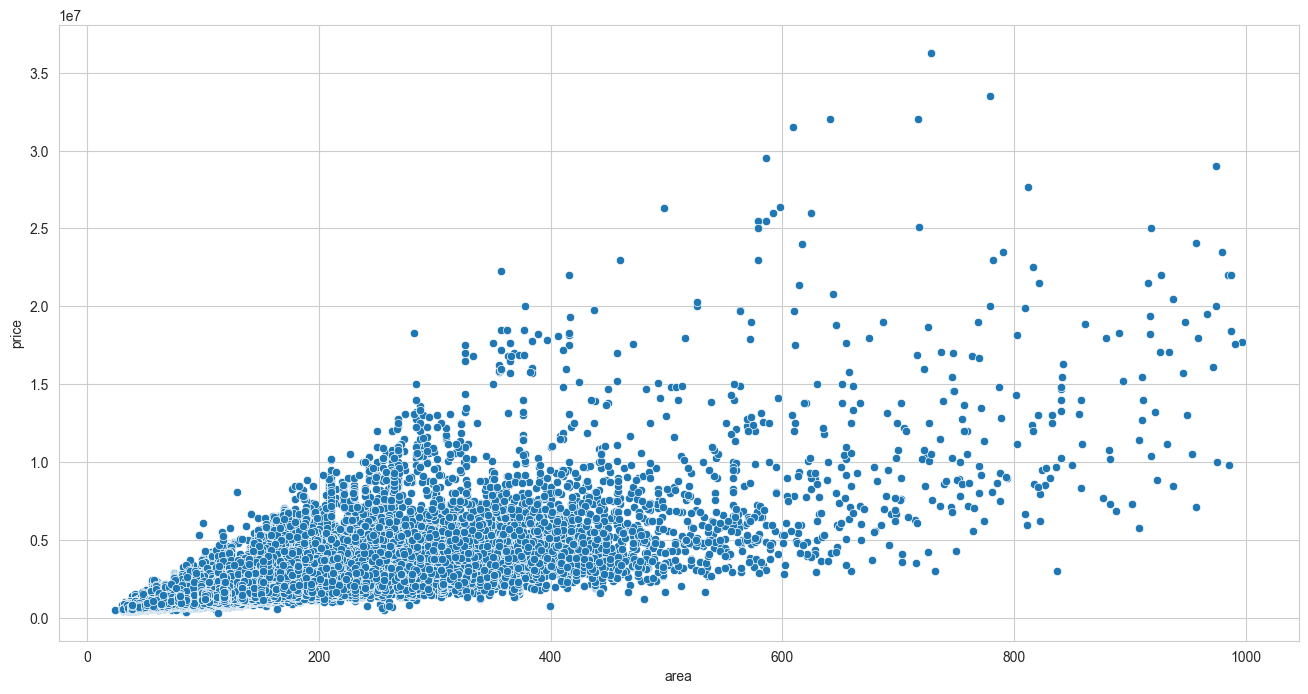

In [252]:
plt.figure(figsize=(16, 8))

sns.scatterplot(data=train, x="area", y="price")

plt.show()

### Integer encoding & partition into Train and Test dataset + transformation

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62948 entries, 0 to 62947
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_key           62948 non-null  object 
 1   price                  62948 non-null  float64
 2   area                   62948 non-null  float64
 3   propertyType           62948 non-null  object 
 4   district               62948 non-null  int64  
 5   typeOfArea             62948 non-null  object 
 6   street                 62948 non-null  object 
 7   project                62948 non-null  object 
 8   marketSegment          62948 non-null  object 
 9   lat                    62948 non-null  float64
 10  lng                    62948 non-null  float64
 11  num_schools_1km        62948 non-null  int64  
 12  num_supermarkets_500m  62948 non-null  int64  
 13  num_mrt_stations_500m  62948 non-null  int64  
 14  tenure_length          62948 non-null  int64  
 15  te

In [253]:
X = train.drop(['property_key', 'price', 'district', 'street', 'project'], axis=1)
y = train['price']

In [254]:
# categorical encoding

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

propertyEncoder = LabelEncoder()
typeAreaEncoder = LabelEncoder()
streetEncoder = LabelEncoder()
projectEncoder = LabelEncoder()
marketSegmentEncoder = LabelEncoder()
tenureEncoder = LabelEncoder()

X['propertyType'] = propertyEncoder.fit_transform(X['propertyType'])
X['typeOfArea'] = typeAreaEncoder.fit_transform(X['typeOfArea'])
X['marketSegment'] = marketSegmentEncoder.fit_transform(X['marketSegment'])
X['tenure_type'] = tenureEncoder.fit_transform(X['tenure_type'])

In [255]:
# standardization

from sklearn.preprocessing import StandardScaler, MinMaxScaler

areaScaler = MinMaxScaler()
priceScaler = MinMaxScaler()

X['area'] = areaScaler.fit_transform(X[['area']]).reshape(-1)

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Modelling with RandomForest

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, RepeatedKFold

In [13]:
def plot_metrics(y_test, y_pred):
    plt.figure(figsize=(16, 8))

    plt.ylabel("Ground Truth")
    plt.xlabel("Prediction")
    scatterplot = sns.scatterplot(x=y_test, y=y_pred)
    sns.lineplot(x=y_test, y=y_test, label="Line of best fit", color='yellow')
    plt.legend()
    
    plt.show()
    
def normalize_RMSE(rmse, minimum, maximum):
    return rmse / (maximum - minimum)

def grid_search(model, param_grid):
    # fold the data into how many split
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
    
    gridSearch = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='neg_root_mean_squared_error')
    gridResult = gridSearch.fit(X_train, y_train)
    params = gridResult.cv_results_['params']
    
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f), with %r" % (mean ,stdev, param))

In [156]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=900, max_depth=20, min_samples_split=10, random_state=42)

rf_model.fit(X_train, y_train)

score_rf = rf_model.score(X_test, y_test)

y_pred_rf = rf_model.predict(X_test)

rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

In [157]:
print("R2_Score:", score_rf)
print("Normalized RMSE:", normalize_RMSE(rmse_rf, y_test.min(), y_test.max()))

R2_Score: 0.9399512875554868
Normalized RMSE: 0.011980738128590827


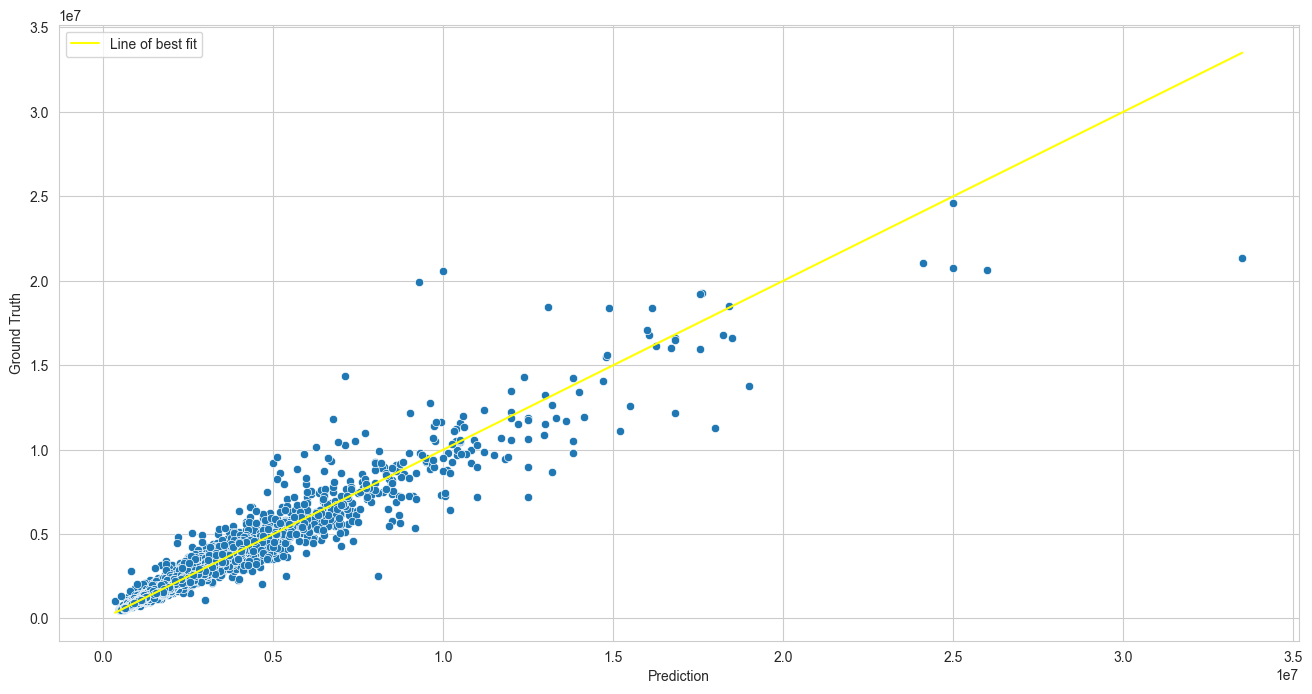

In [158]:
plot_metrics(y_test, y_pred_rf)

In [268]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    learning_rate=0.1, 
    n_estimators=400, 
    random_state=42, 
    min_child_weight=2, 
    subsample=1, 
    colsample_bytree=0.8, 
    reg_lambda=0.45, 
    reg_alpha=0, 
    gamma=0.5
)

xgb_model.fit(X_train, y_train)

xgb_score = xgb_model.score(X_test, y_test)

y_pred_xgb = xgb_model.predict(X_test)

rmse_xgb = mean_squared_error(y_pred_xgb, y_test, squared=False)

In [269]:
print("R2_Score:", xgb_score)
print("RMSE:", rmse_xgb)
print("Normalized RMSE:", normalize_RMSE(rmse_xgb, y_test.min(), y_test.max()))

R2_Score: 0.9458721484079066
RMSE: 381890.46682630444
Normalized RMSE: 0.014699402110327347


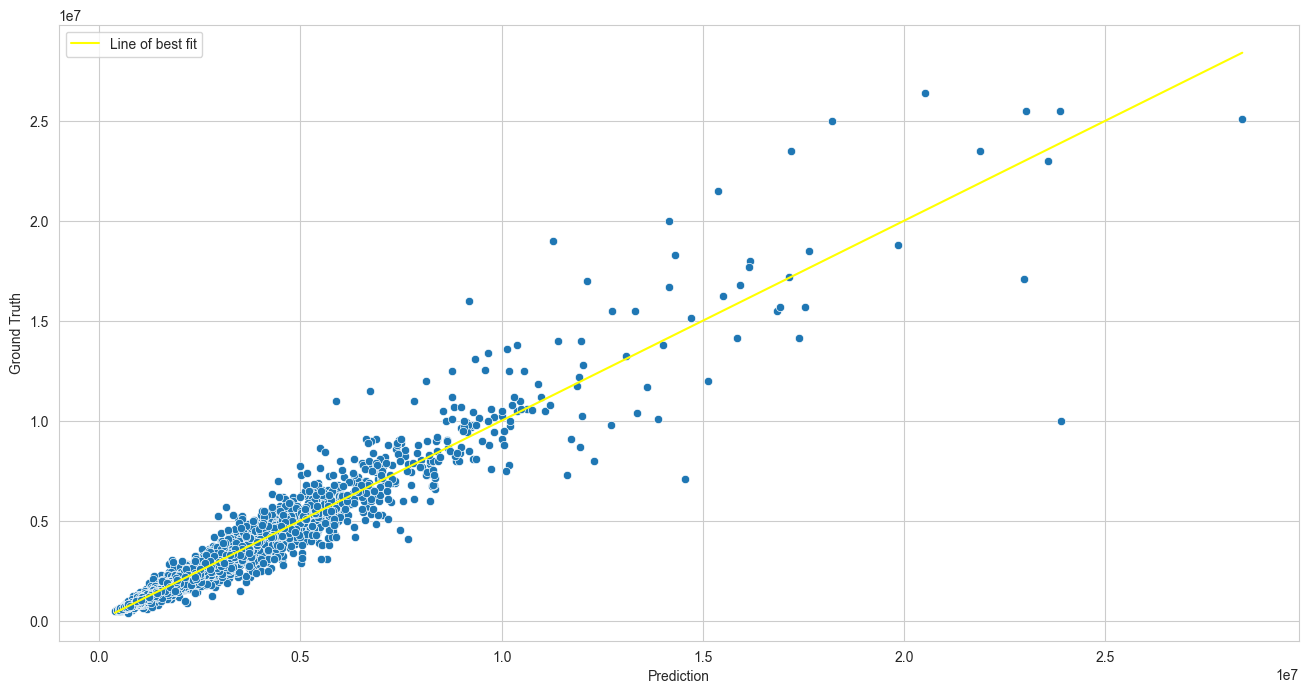

In [260]:
plot_metrics(y_pred_xgb, y_test)

In [163]:
import lightgbm as lgb

lgb_params = {
    "learning_rate": 0.15,
    "n_estimators": 64,
    "min_child_weight": 2,
    "num_leaves": 36,
    "colsample_bytree": 0.8,
    "reg_lambda": 0.40,
    "reg_sqrt": True,
    "metric": "rmse"
}

lgb_model = lgb.train(lgb_params, lgb.Dataset(X_train, label=y_train), valid_sets=[lgb.Dataset(X_test, label=y_test)])

y_pred_lgb = lgb_model.predict(X_test)

rmse_lgb = mean_squared_error(y_pred_lgb, y_test, squared=False)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 50359, number of used features: 16
[LightGBM] [Info] Start training from score 1293.535786
[1]	valid_0's rmse: 1.53813e+06
[2]	valid_0's rmse: 1.44454e+06
[3]	valid_0's rmse: 1.31652e+06
[4]	valid_0's rmse: 1.19998e+06
[5]	valid_0's rmse: 1.09659e+06
[6]	valid_0's rmse: 1.038e+06
[7]	valid_0's rmse: 954429
[8]	valid_0's rmse: 880393
[9]	valid_0's rmse: 817254
[10]	valid_0's rmse: 760926
[11]	valid_0's rmse: 714287
[12]	valid_0's rmse: 673074
[13]	valid_0's rmse: 644021
[14]	valid_0's rmse: 616382
[15]	valid_0's rmse: 595174
[16]	valid_0's rmse: 576983
[17]	valid_0's rmse: 564395
[18]	valid_0's rmse: 549285
[19]	valid_0's rmse: 538227
[20]	valid_0's rmse: 528852
[21]	valid

C:\Users\Usrer\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


In [164]:
print("Normalized RMSE:", normalize_RMSE(rmse_lgb, y_test.min(), y_test.max()))

Normalized RMSE: 0.01284073563303581


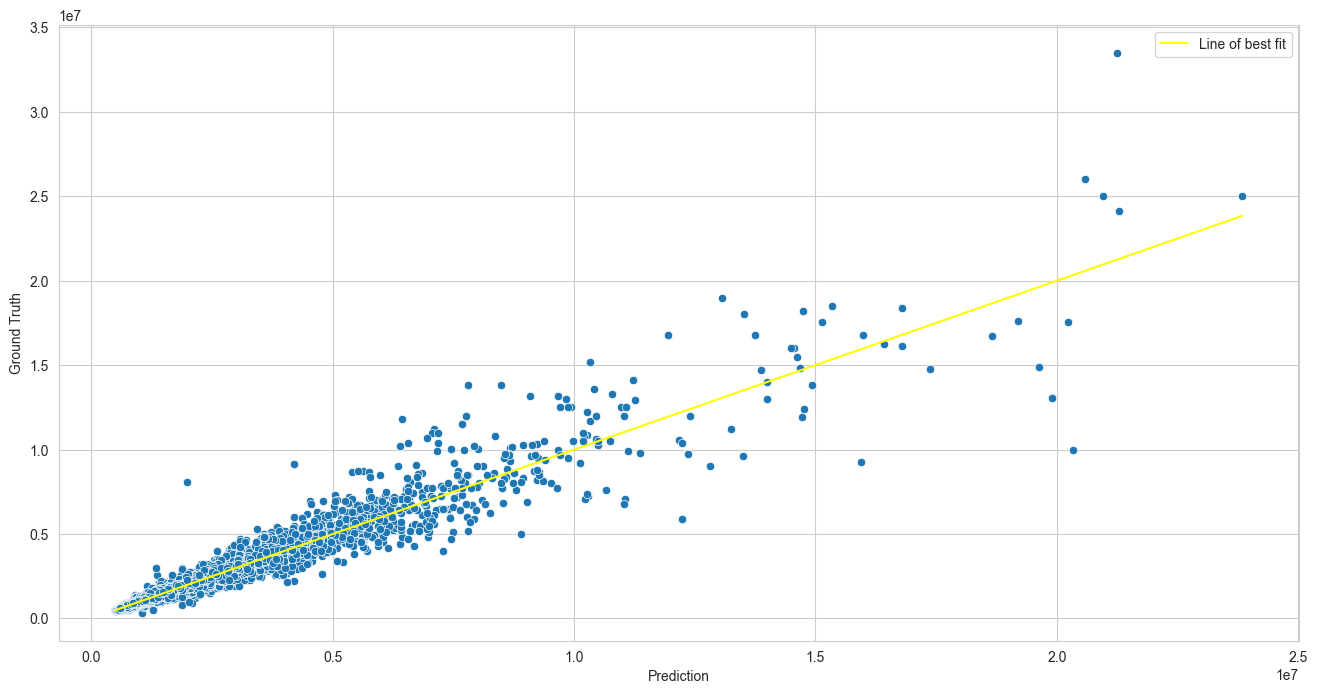

In [165]:
plot_metrics(y_pred_lgb, y_test)

### Hybrid Regression Model with RF, XFB, and LightGBM

In [166]:
hybrid_pred = np.mean(np.vstack([y_pred_rf, y_pred_xgb, y_pred_lgb]), axis=0)

rmse_hybrid = mean_squared_error(hybrid_pred, y_test, squared=False)

In [167]:
print("Normalized RMSE:", normalize_RMSE(rmse_hybrid, y_test.min(), y_test.max()))

Normalized RMSE: 0.011719373242512019


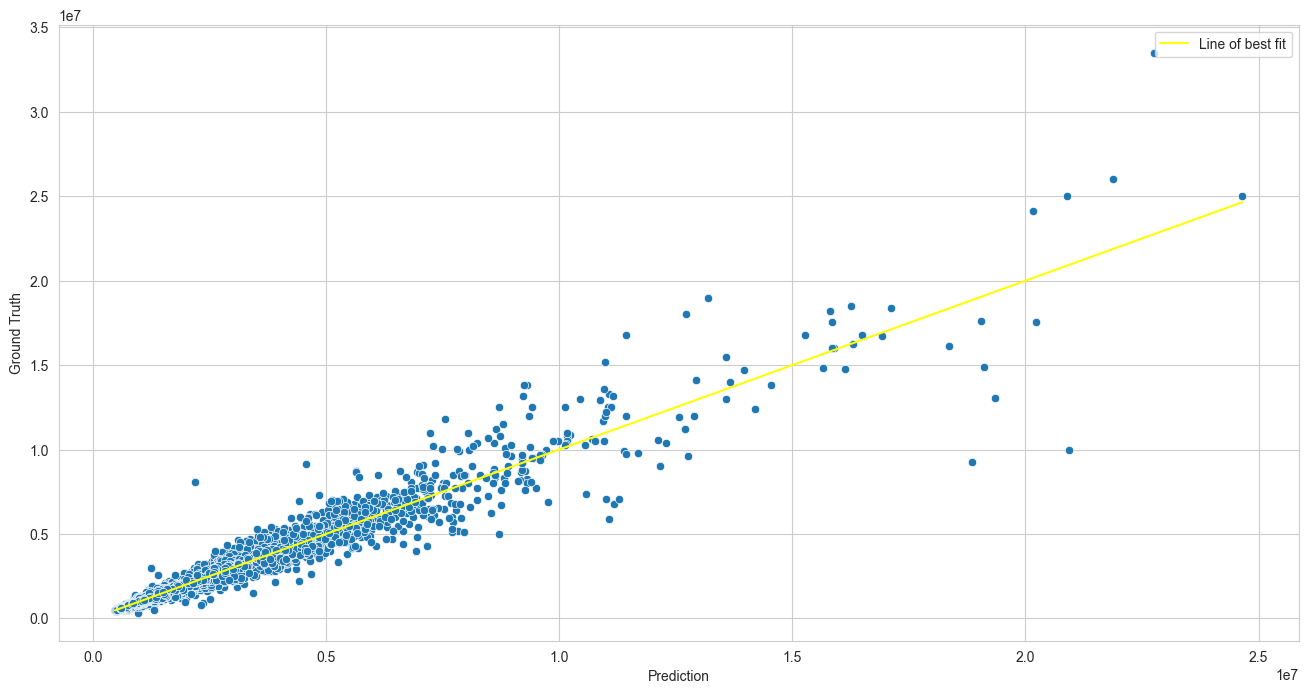

In [168]:
plot_metrics(hybrid_pred, y_test)

### Creating submission.csv

Train all the models together with entire `X` and `y` dataset except `lgb_regressor`. Then, these 3 models will be combined together through ensemble technique to predict `test` dataset. The predictions are combined together by calculating the averages of 3 predictions made by respective models. 

In [169]:
random_forest = RandomForestRegressor(n_estimators=900, max_depth=20, min_samples_split=10, random_state=42)
random_forest.fit(X, y)

xgboost_regressor = XGBRegressor(
    learning_rate=0.1, 
    n_estimators=200, 
    random_state=42, 
    min_child_weight=2, 
    subsample=1, 
    colsample_bytree=0.8, 
    reg_lambda=0.45, 
    reg_alpha=0, 
    gamma=0.5
)
xgboost_regressor.fit(X, y)

lgb_params = {
    "learning_rate": 0.15,
    "n_estimators": 64,
    "min_child_weight": 2,
    "num_leaves": 36,
    "colsample_bytree": 0.8,
    "reg_lambda": 0.40,
    "reg_sqrt": True,
    "metric": "rmse"
}
lgb_regressor = lgb.train(lgb_params, lgb.Dataset(X_train, label=y_train), valid_sets=[lgb.Dataset(X_test, label=y_test)])

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 50359, number of used features: 16
[LightGBM] [Info] Start training from score 1293.535786
[1]	valid_0's rmse: 1.53813e+06
[2]	valid_0's rmse: 1.44454e+06
[3]	valid_0's rmse: 1.31652e+06
[4]	valid_0's rmse: 1.19998e+06
[5]	valid_0's rmse: 1.09659e+06
[6]	valid_0's rmse: 1.038e+06
[7]	valid_0's rmse: 954429
[8]	valid_0's rmse: 880393
[9]	valid_0's rmse: 817254
[10]	valid_0's rmse: 760926
[11]	valid_0's rmse: 714287
[12]	valid_0's rmse: 673074
[13]	valid_0's rmse: 644021
[14]	valid_0's rmse: 616382
[15]	valid_0's rmse: 595174
[16]	valid_0's rmse: 576983
[17]	valid_0's rmse: 564395
[18]	valid_0's rmse: 549285
[19]	valid_0's rmse: 538227
[20]	valid_0's rmse: 528852
[21]	valid_0's rmse: 522748
[22]	valid_0's rmse: 513865
[23]	valid_0's rms

C:\Users\Usrer\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


### Preparing `test` dataset for predictions

In [103]:
def hybrid_model_predictions(test_data):
    y_pred_rf = random_forest.predict(test_data)
    y_pred_xgb = xgboost_regressor.predict(test_data)
    y_pred_lgb = lgb_regressor.predict(test_data)
    
    # combine and calculate the average across row
    hybrid_pred = np.mean(np.vstack([y_pred_rf, y_pred_xgb, y_pred_lgb]), axis=0)
    
    return hybrid_pred

In [170]:
submission = test.copy(deep=True)

In [171]:
submission.shape

(2331, 2)

In [219]:
test = pd.read_csv("test.csv")
test = pd.merge(left=test, right=properties, on="property_key")
test = pd.merge(left=test, right=geo_attributes, on=["project", "district", "street"], how="left")

In [220]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2330
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_key           2331 non-null   object 
 1   contractDate           2331 non-null   object 
 2   area                   2331 non-null   float64
 3   floorRange             2331 non-null   object 
 4   propertyType           2331 non-null   object 
 5   district               2331 non-null   int64  
 6   typeOfArea             2331 non-null   object 
 7   tenure                 2331 non-null   object 
 8   street                 2331 non-null   object 
 9   project                2331 non-null   object 
 10  marketSegment          2331 non-null   object 
 11  lat                    2330 non-null   float64
 12  lng                    2330 non-null   float64
 13  num_schools_1km        2330 non-null   float64
 14  num_supermarkets_500m  2330 non-null   float64
 15  num_

In [221]:
test.loc[test['num_mrt_stations_500m'].isna()]

,property_key,contractDate,area,floorRange,propertyType,district,typeOfArea,tenure,street,project,marketSegment,lat,lng,num_schools_1km,num_supermarkets_500m,num_mrt_stations_500m
1662,p-f4822a16f,2023-03-01,939.0,-,Strata Detached,19,Strata,Freehold,PONGGOL SEVENTEENTH AVENUE,NORTHSHORE BUNGALOWS,OCR,NaN,NaN,NaN,NaN,NaN


In [222]:
test.loc[test['num_mrt_stations_500m'].isna(), 'lat'] = 1.415312 # find from google map
test.loc[test['num_mrt_stations_500m'].isna(), 'lng'] = 103.904061
test.loc[test['num_mrt_stations_500m'].isna(), 'num_schools_1km'] = test['num_schools_1km'].mean()
test.loc[test['num_mrt_stations_500m'].isna(), 'num_supermarkets_500m'] = test['num_supermarkets_500m'].mean()
test.loc[test['num_mrt_stations_500m'].isna(), 'num_mrt_stations_500m'] = test['num_mrt_stations_500m'].mean()

In [223]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2330
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_key           2331 non-null   object 
 1   contractDate           2331 non-null   object 
 2   area                   2331 non-null   float64
 3   floorRange             2331 non-null   object 
 4   propertyType           2331 non-null   object 
 5   district               2331 non-null   int64  
 6   typeOfArea             2331 non-null   object 
 7   tenure                 2331 non-null   object 
 8   street                 2331 non-null   object 
 9   project                2331 non-null   object 
 10  marketSegment          2331 non-null   object 
 11  lat                    2331 non-null   float64
 12  lng                    2331 non-null   float64
 13  num_schools_1km        2331 non-null   float64
 14  num_supermarkets_500m  2331 non-null   float64
 15  num_

In [224]:
test = process_data(test)
test = test.drop(['property_key', 'district', 'street', 'project'], axis=1)

In [225]:
test['propertyType'] = propertyEncoder.transform(test['propertyType'])
test['typeOfArea'] = typeAreaEncoder.transform(test['typeOfArea'])
test['marketSegment'] = marketSegmentEncoder.transform(test['marketSegment'])
test['tenure_type'] = tenureEncoder.transform(test['tenure_type'])

In [232]:
final_pred = hybrid_model_predictions(test)

In [233]:
submission['prediction'] = final_pred

In [234]:
submission

,property_key,contractDate,prediction
0,p-ff93e87ab,2023-01-01,1.631960e+07
1,p-38fe6afe9,2023-01-01,1.044818e+07
2,p-fc9650179,2023-01-01,9.070766e+06
3,p-59a09ad08,2023-01-01,8.053809e+06
4,p-808332e5c,2023-01-01,8.940595e+06
...,...,...,...
2326,p-56681c564,2023-03-01,9.134094e+06
2327,p-89a6ff5de,2023-03-01,9.275265e+06
2328,p-920d750e9,2023-03-01,1.303473e+07
2329,p-e7146b43c,2023-03-01,1.719438e+07


In [231]:
submission.to_csv("submission.csv", index=False)